# Emulate using NGP interpolation

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import simplest_emulator

### Specify suite of simulations to use, read P1D arxiv and setup simplest emulator

In [2]:
basedir='../mini_sim_suite/'
skewers_label='Ns50_wM0.1'
emu=simplest_emulator.SimplestEmulator(basedir,skewers_label,verbose=True)

latin hyper-cube data {'param_space': {'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'Delta2_star': {'ip': 1, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'mu_He': {'ip': 2, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}}, 'nsamples': 5, 'samples': {'0': [0.961, 0.39, 1.25], '1': [0.965, 0.31, 0.9500000000000001], '2': [0.969, 0.35, 1.55], '3': [0.973, 0.27, 0.65], '4': [0.957, 0.43000000000000005, 1.85]}}
simulation suite has 5 samples
0 sample has sim params = [0.961, 0.39, 1.25]
simulation has 7 redshifts
../mini_sim_suite//sim_pair_0 does not have this snapshot 0
1 sample has sim params = [0.965, 0.31, 0.9500000000000001]
simulation has 7 redshifts
../mini_sim_suite//sim_pair_1 does not have this snapshot 0
2 sample has sim params = [0.969, 0.35, 1.55]
simulation has 7 redshifts
../mini_sim_suite//sim_pair_2 does not have this snapshot 0
3 sample has sim params =

### Interpolate to a particular point in parameter space

In [3]:
model={'mF':0.7,'sigT_Mpc':0.1,'gamma':1.5,'Delta2_p':0.4, 'f_p':0.98}
nearest_model=emu.get_nearest_model(model)
print('parameter / model / nearest')
for key,value in model.items():
    print(key,value,nearest_model[key])

parameter / model / nearest
mF 0.7 0.7646433151030525
sigT_Mpc 0.1 0.11372348354977069
gamma 1.5 1.7022191310395935
Delta2_p 0.4 0.3414285954308408
f_p 0.98 0.9824255117078093


### Plot P1D when varying one of the parameters

In [4]:
# identify mean model
mean_mF=np.mean(emu.arxiv.mF)
mean_sigT_Mpc=np.mean(emu.arxiv.sigT_Mpc)
mean_gamma=np.mean(emu.arxiv.gamma)
mean_Delta2_p=np.mean(emu.arxiv.Delta2_p)
mean_f_p=np.mean(emu.arxiv.f_p)
mean_model={'mF':mean_mF,'sigT_Mpc':mean_sigT_Mpc,'gamma':mean_gamma,'Delta2_p':mean_Delta2_p,'f_p':mean_f_p}
print('mean model =',mean_model)

mean model = {'mF': 0.7801912855813985, 'sigT_Mpc': 0.12763024111468957, 'gamma': 1.4511495094676341, 'Delta2_p': 0.34593086815726304, 'f_p': 0.97908376832539645}


In [5]:
def plot_p1d_dependence(emu,mean_model,param,xmin,xmax):
    
    # deep copy of dictionary (thread safe, why not)
    model = json.loads(json.dumps(mean_model))
    
    plt.figure()
    # define range of parameter values to explore    
    Nx=10
    xs=np.linspace(xmin,xmax,Nx)
    for i in range(Nx):
        x=xs[i]
        model[param]=x
        k_Mpc, p1d_Mpc = emu.emulate_p1d(model)
        col = plt.cm.jet((x-xmin)/(xmax-xmin))
        if i in [0,Nx-1]:
            label=param+' = %f'%xs[i]
        else:
            label=None
        plt.semilogx(k_Mpc,k_Mpc*p1d_Mpc,color=col,label=label)
        
    plt.xlabel(r'$k_\parallel$ [1/Mpc]')
    plt.ylabel(r'$k_\parallel \quad P_{\rm 1D}(k_\parallel)$')
    plt.legend()
    plt.title(r'P1D as a function of '+param)
        
    return

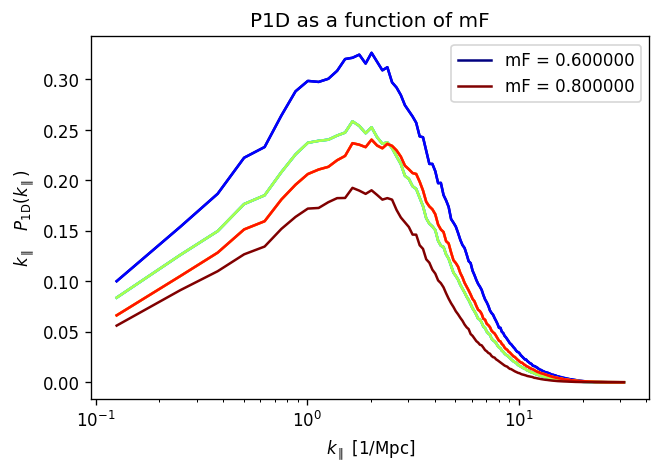

In [6]:
plot_p1d_dependence(emu,model,'mF',0.6,0.8)

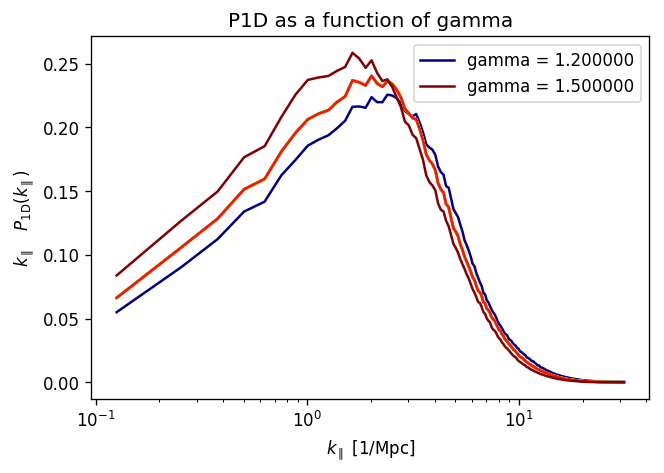

In [7]:
plot_p1d_dependence(emu,model,'gamma',1.2,1.5)

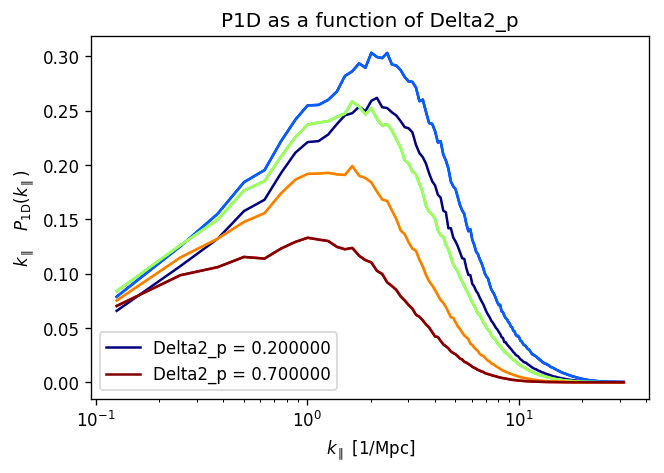

In [8]:
plot_p1d_dependence(emu,model,'Delta2_p',0.2,0.7)